Exploratory Data Analysis on Sales Retail Dataset

# Install / Import libs & load dataset

In [1]:
# Cell 1 - install (openpyxl ensures Excel reading) and import libs
!pip install -q openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import os

# For Colab file upload or drive mount
from google.colab import files
uploaded = files.upload()

# Display settings (optional)
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)


Saving UTF8CleanedSalesData by ozee.xlsx to UTF8CleanedSalesData by ozee.xlsx


In [2]:


df = pd.read_excel('UTF8CleanedSalesData by ozee.xlsx', sheet_name=0, engine='openpyxl')
df_original = df.copy()
df.head(8)


,Transaction ID,Customer Name,Product Category,Quantity Sold,Sale Amount ($),Transaction Date,Is Return
0,TXN0096,John Doe,Furniture,1,227.66,2024-01-26,True
1,TXN0426,Chen Wei,Furniture,8,376.78,2024-02-18,False
2,TXN0239,Chen Wei,Furniture,3,271.67,2024-01-17,False
3,TXN0345,Unknown,Electronics,5,406.23,2024-01-11,False
4,TXN0008,Unknown,Home Appliances,2,419.21,2024-01-25,True
5,TXN0303,Unknown,Electronics,8,474.09,2024-02-28,False
6,TXN0107,Unknown,Furniture,2,236.22,2024-01-14,True
7,TXN0115,Unknown,Electronics,4,197.12,2024-01-31,False


# Quick initial inspection & data quality report

In [3]:

print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all').T)

def data_quality_report(df):
    cols = []
    for c in df.columns:
        dtype = df[c].dtype
        missing = df[c].isna().sum()
        missing_pct = missing / len(df) * 100
        unique = df[c].nunique(dropna=True)
        sample = df[c].dropna().astype(str).sample(min(3, df[c].dropna().shape[0])).tolist() if df[c].dropna().shape[0] > 0 else []
        cols.append((c, str(dtype), missing, round(missing_pct,2), unique, sample))
    dq = pd.DataFrame(cols, columns=['column','dtype','missing_count','missing_pct','unique_count','sample_values'])
    return dq

dq_report = data_quality_report(df)
display(dq_report)


Shape: (475, 7)


,Transaction ID,Customer Name,Product Category,Quantity Sold,Sale Amount ($),Transaction Date,Is Return
0,TXN0096,John Doe,Furniture,1,227.66,2024-01-26,True
1,TXN0426,Chen Wei,Furniture,8,376.78,2024-02-18,False
2,TXN0239,Chen Wei,Furniture,3,271.67,2024-01-17,False
3,TXN0345,Unknown,Electronics,5,406.23,2024-01-11,False
4,TXN0008,Unknown,Home Appliances,2,419.21,2024-01-25,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    475 non-null    object        
 1   Customer Name     475 non-null    object        
 2   Product Category  475 non-null    object        
 3   Quantity Sold     475 non-null    int64         
 4   Sale Amount ($)   431 non-null    object        
 5   Transaction Date  475 non-null    datetime64[ns]
 6   Is Return         475 non-null    bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 22.9+ KB


None

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Transaction ID,475,475,TXN0173,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,475,6,Maria Gomez,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product Category,475,4,Furniture,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity Sold,475.0,NaN,NaN,NaN,4.075789,0.0,2.0,3.0,6.0,9.0,2.696017
Sale Amount ($),431.0,427.0,483.47,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction Date,475,NaN,NaN,NaN,2024-01-29 05:12:15.157894656,2024-01-01 00:00:00,2024-01-15 00:00:00,2024-01-29 00:00:00,2024-02-12 00:00:00,2024-02-29 00:00:00,NaN
Is Return,475,2,False,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,column,dtype,missing_count,missing_pct,unique_count,sample_values
0,Transaction ID,object,0,0.00,475,"[TXN0058, TXN0392, TXN0231]"
1,Customer Name,object,0,0.00,6,"[John Doe, Ali Khan, Ali Khan]"
2,Product Category,object,0,0.00,4,"[Furniture, Furniture, Electronics]"
3,Quantity Sold,int64,0,0.00,10,"[8, 3, 1]"
4,Sale Amount ($),object,44,9.26,427,"[425.11, 427.88, 340.1]"
5,Transaction Date,datetime64[ns],0,0.00,60,"[2024-02-12, 2024-01-21, 2024-01-20]"
6,Is Return,bool,0,0.00,2,"[True, True, False]"


#Standardize columns (safe transform)


In [4]:
df.columns = [c.strip() for c in df.columns]  # remove leading/trailing spaces
display(df.columns.tolist())
df.head(5)


['Transaction ID',
 'Customer Name',
 'Product Category',
 'Quantity Sold',
 'Sale Amount ($)',
 'Transaction Date',
 'Is Return']

,Transaction ID,Customer Name,Product Category,Quantity Sold,Sale Amount ($),Transaction Date,Is Return
0,TXN0096,John Doe,Furniture,1,227.66,2024-01-26,True
1,TXN0426,Chen Wei,Furniture,8,376.78,2024-02-18,False
2,TXN0239,Chen Wei,Furniture,3,271.67,2024-01-17,False
3,TXN0345,Unknown,Electronics,5,406.23,2024-01-11,False
4,TXN0008,Unknown,Home Appliances,2,419.21,2024-01-25,True


# Type Conversions & Cleaning Key Columns

In [5]:
# Cell 6 - convert numeric & dates, handle common issues
# Adjust these column names if they differ from your file
# Common names in your file: 'Transaction ID','Customer Name','Product Category','Quantity Sold','Sale Amount ($)','Transaction Date','Is Return'
cols_map = {
    'Transaction ID':'Transaction_ID',
    'Customer Name':'Customer_Name',
    'Product Category':'Product_Category',
    'Quantity Sold':'Quantity_Sold',
    'Sale Amount ($)':'Sale_Amount',
    'Transaction Date':'Transaction_Date',
    'Is Return':'Is_Return'
}
# rename only existing columns
df = df.rename(columns={k:v for k,v in cols_map.items() if k in df.columns})
df.head(3)

# Parse dates (try dayfirst=True to handle '26-01-2024' formats)
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce', dayfirst=True)

# Numeric conversions
if 'Sale_Amount' in df.columns:
    df['Sale_Amount'] = pd.to_numeric(df['Sale_Amount'], errors='coerce')
if 'Quantity_Sold' in df.columns:
    df['Quantity_Sold'] = pd.to_numeric(df['Quantity_Sold'], errors='coerce')

# Standardize Is_Return column
if 'Is_Return' in df.columns:
    df['Is_Return'] = df['Is_Return'].astype(str).str.strip().str.lower().isin(['true','yes','1','t'])
else:
    # infer returns from negative quantity
    df['Is_Return'] = df['Quantity_Sold'] < 0

# Quick check after conversion
display(df[['Transaction_ID','Transaction_Date','Quantity_Sold','Sale_Amount','Is_Return']].head(10))
print("Missing dates:", df['Transaction_Date'].isna().sum())


,Transaction_ID,Transaction_Date,Quantity_Sold,Sale_Amount,Is_Return
0,TXN0096,2024-01-26,1,227.66,True
1,TXN0426,2024-02-18,8,376.78,False
2,TXN0239,2024-01-17,3,271.67,False
3,TXN0345,2024-01-11,5,406.23,False
4,TXN0008,2024-01-25,2,419.21,True
5,TXN0303,2024-02-28,8,474.09,False
6,TXN0107,2024-01-14,2,236.22,True
7,TXN0115,2024-01-31,4,197.12,False
8,TXN0246,2024-01-15,4,483.47,False
9,TXN0210,2024-02-16,9,402.62,False


Missing dates: 0


#Handle duplicates & transaction id uniqueness

In [6]:
# Cell 7 - duplicates
if 'Transaction_ID' in df.columns:
    dup_ids = df[df.duplicated(subset=['Transaction_ID'], keep=False)]
    print("Duplicate Transaction IDs found:", dup_ids.shape[0])
    if dup_ids.shape[0] > 0:
        display(dup_ids.head(10))
        # Option: keep first occurrence and drop exact duplicate rows
        df = df.drop_duplicates(subset=['Transaction_ID'], keep='first')
        print("Dropped exact duplicate transaction IDs.")
else:
    print("Transaction_ID column not found; skipping duplicates step.")


Duplicate Transaction IDs found: 0


# Standardize text fields (categories, customers)

In [7]:

if 'Product_Category' in df.columns:
    df['Product_Category'] = df['Product_Category'].astype(str).str.strip().str.replace('_',' ').str.lower().str.title()

# replace blank customer names
if 'Customer_Name' in df.columns:
    df['Customer_Name'] = df['Customer_Name'].replace('', np.nan)
    df['Customer_Name'] = df['Customer_Name'].fillna('Guest').astype(str).str.strip().str.title()

display(df[['Customer_Name','Product_Category']].head(8))


,Customer_Name,Product_Category
0,John Doe,Furniture
1,Chen Wei,Furniture
2,Chen Wei,Furniture
3,Unknown,Electronics
4,Unknown,Home Appliances
5,Unknown,Electronics
6,Unknown,Furniture
7,Unknown,Electronics


# Create calculated columns: Net_Revenue, Unit_Price, Net_Quantity

In [8]:
# Cell 9 - calculated fields
# Keep sign in Net_Quantity (negative for returns)
df['Net_Quantity'] = df['Quantity_Sold']

# Net_Revenue: negative for returns, positive otherwise
df['Net_Revenue'] = np.where(df['Is_Return'], -df['Sale_Amount'].abs(), df['Sale_Amount'].abs())

# Unit_Price (handle 0 or NaN quantity)
df['Unit_Price'] = df['Sale_Amount'] / df['Quantity_Sold'].abs().replace({0: np.nan})
df['Unit_Price'] = df['Unit_Price'].replace([np.inf, -np.inf], np.nan)

# Add simple time features
df['Year'] = df['Transaction_Date'].dt.year
df['Month'] = df['Transaction_Date'].dt.month
df['MonthName'] = df['Transaction_Date'].dt.strftime('%b')
df['Weekday'] = df['Transaction_Date'].dt.day_name()
df['Quarter'] = df['Transaction_Date'].dt.quarter

display(df[['Transaction_ID','Net_Quantity','Net_Revenue','Unit_Price','Year','MonthName']].head(8))


,Transaction_ID,Net_Quantity,Net_Revenue,Unit_Price,Year,MonthName
0,TXN0096,1,-227.66,227.660000,2024,Jan
1,TXN0426,8,376.78,47.097500,2024,Feb
2,TXN0239,3,271.67,90.556667,2024,Jan
3,TXN0345,5,406.23,81.246000,2024,Jan
4,TXN0008,2,-419.21,209.605000,2024,Jan
5,TXN0303,8,474.09,59.261250,2024,Feb
6,TXN0107,2,-236.22,118.110000,2024,Jan
7,TXN0115,4,197.12,49.280000,2024,Jan


# Data quality report AFTER cleaning (before/after comparison)

In [9]:
# Cell 10 - before/after snapshot counts
before_rows = df_original.shape[0]
after_rows = df.shape[0]
print(f"Rows before: {before_rows}  | Rows after cleaning: {after_rows}")

# show missing value summary after cleaning
dq_after = data_quality_report(df)
display(dq_after)

# Save a small 'before vs after' sample to share (screenshot friendly)
before_sample = df_original.head(7)
after_sample = df.head(7)
before_sample.to_csv('before_sample.csv', index=False)
after_sample.to_csv('after_sample.csv', index=False)
print("Saved before_sample.csv and after_sample.csv in /content — download if you want.")


Rows before: 475  | Rows after cleaning: 475


,column,dtype,missing_count,missing_pct,unique_count,sample_values
0,Transaction_ID,object,0,0.00,475,"[TXN0377, TXN0289, TXN0262]"
1,Customer_Name,object,0,0.00,6,"[Maria Gomez, John Doe, Ali Khan]"
2,Product_Category,object,0,0.00,3,"[Furniture, Home Appliances, Furniture]"
3,Quantity_Sold,int64,0,0.00,10,"[1, 4, 9]"
4,Sale_Amount,float64,46,9.68,425,"[25.55, 297.55, 411.0]"
5,Transaction_Date,datetime64[ns],0,0.00,60,"[2024-02-23, 2024-02-27, 2024-01-14]"
6,Is_Return,bool,0,0.00,2,"[False, False, True]"
7,Net_Quantity,int64,0,0.00,10,"[1, 6, 8]"
8,Net_Revenue,float64,46,9.68,425,"[429.51, 215.98, -128.87]"
9,Unit_Price,float64,66,13.89,409,"[56.825714285714284, 43.83, 21.435]"


Saved before_sample.csv and after_sample.csv in /content — download if you want.


# Aggregations: category & monthly summaries

In [10]:

category_summary = df.groupby('Product_Category').agg(
    total_revenue=('Net_Revenue','sum'),
    total_units=('Net_Quantity','sum'),
    orders_count=('Transaction_ID','nunique'),
    avg_unit_price=('Unit_Price','mean'),
    returns_count=('Is_Return','sum')
).reset_index()
category_summary['return_rate'] = (category_summary['returns_count'] / category_summary['orders_count']).fillna(0)
category_summary = category_summary.sort_values('total_revenue', ascending=False)
display(category_summary)

# monthly revenue (time series)
daily = df.groupby('Transaction_Date').agg(Daily_Revenue=('Net_Revenue','sum')).sort_index()
monthly = daily.resample('M').sum()
monthly = monthly.rename(columns={'Daily_Revenue':'Monthly_Revenue'})
monthly = monthly.reset_index()
display(monthly.head(12))


,Product_Category,total_revenue,total_units,orders_count,avg_unit_price,returns_count,return_rate
0,Electronics,21867.11,651,148,81.186461,34,0.229730
2,Home Appliances,20802.35,669,168,98.822499,39,0.232143
1,Furniture,18028.39,616,159,112.005973,37,0.232704


/tmp/ipython-input-451034591.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = daily.resample('M').sum()


,Transaction_Date,Monthly_Revenue
0,2024-01-31,32215.79
1,2024-02-29,28482.06


# Outlier detection (IQR & z-score examples)

In [11]:
# Cell 12 - outlier detection using IQR for Unit_Price and Quantity
def flag_iqr_outliers(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return (~series.between(lower, upper)).astype(int)

df['Flag_UnitPrice_Outlier'] = df['Unit_Price'].pipe(lambda s: flag_iqr_outliers(s.fillna(s.median())))
df['Flag_Quantity_Outlier'] = df['Quantity_Sold'].pipe(lambda s: flag_iqr_outliers(s.fillna(s.median())))
display(df[['Transaction_ID','Quantity_Sold','Unit_Price','Flag_UnitPrice_Outlier','Flag_Quantity_Outlier']].sort_values('Flag_UnitPrice_Outlier', ascending=False).head(10))


,Transaction_ID,Quantity_Sold,Unit_Price,Flag_UnitPrice_Outlier,Flag_Quantity_Outlier
221,TXN0222,1,486.73,1,0
193,TXN0227,1,409.72,1,0
293,TXN0225,1,406.26,1,0
462,TXN0374,1,313.89,1,0
461,TXN0236,1,474.92,1,0
271,TXN0475,1,349.46,1,0
152,TXN0165,1,307.26,1,0
153,TXN0293,1,362.00,1,0
320,TXN0362,1,365.26,1,0
111,TXN0302,1,259.29,1,0


# RFM (Recency, Frequency, Monetary) per customer

In [12]:
# Cell 13 - RFM
snapshot_date = df['Transaction_Date'].max() + timedelta(days=1)
rfm = df.groupby('Customer_Name').agg(
    Recency_days = ('Transaction_Date', lambda x: (snapshot_date - x.max()).days),
    Frequency = ('Transaction_ID','nunique'),
    Monetary = ('Net_Revenue','sum')
).reset_index()

# create RFM scores (1-5)
rfm['R_Score'] = pd.qcut(rfm['Recency_days'].rank(method='first'), 5, labels=[5,4,3,2,1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm = rfm.sort_values('Monetary', ascending=False)
display(rfm.head(12))


,Customer_Name,Recency_days,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment
1,Chen Wei,1,78,13446.48,5,2,5,525
2,Jane Smith,3,75,12062.61,2,1,4,214
5,Unknown,2,85,11475.53,3,4,3,343
3,John Doe,3,68,9751.45,1,1,2,112
4,Maria Gomez,1,90,6990.31,4,5,1,451
0,Ali Khan,1,79,6971.47,5,3,1,531


# Visualizations (matplotlib only)

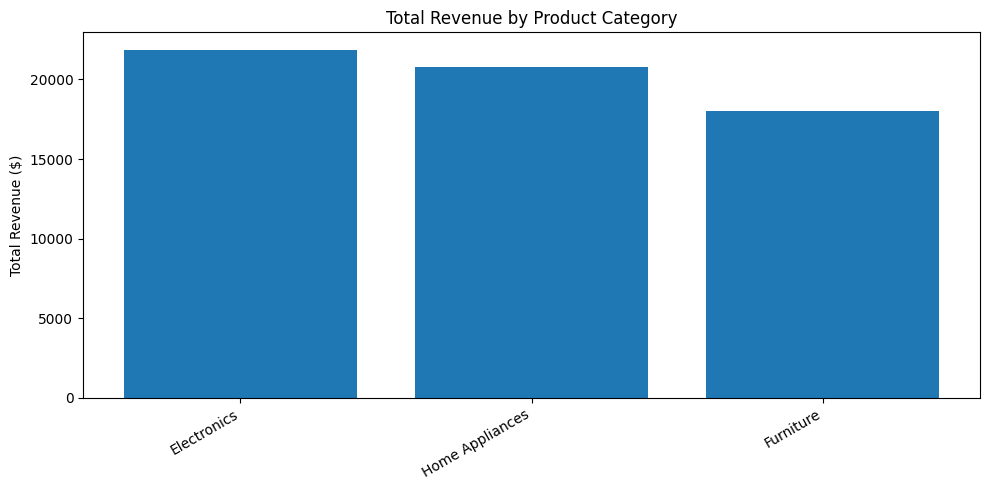

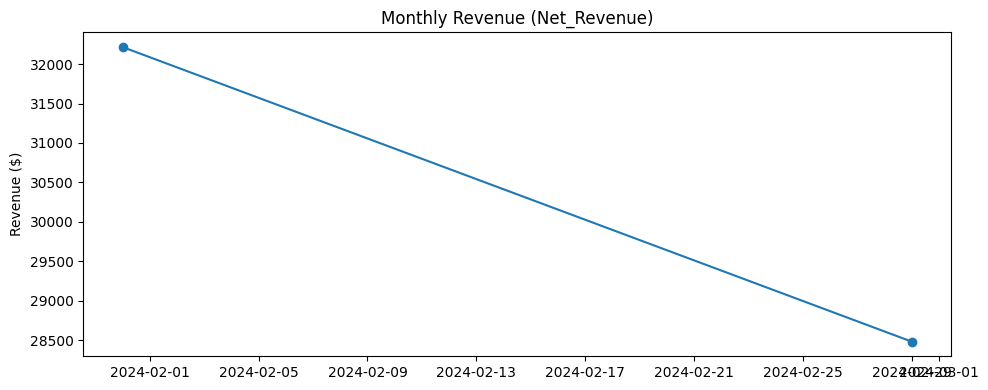

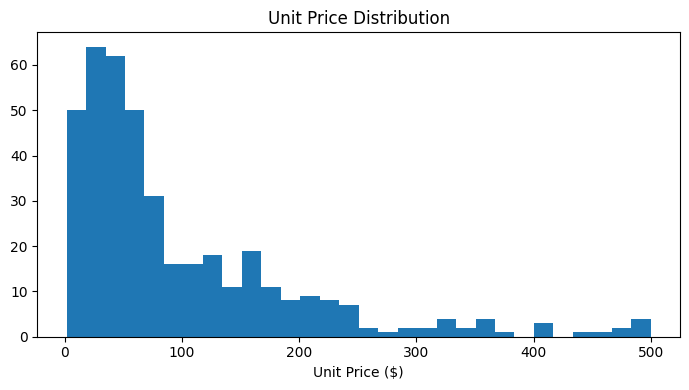

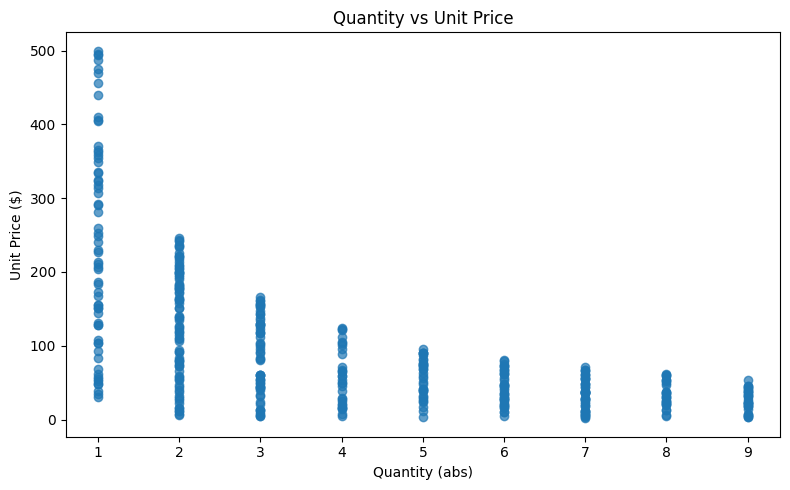

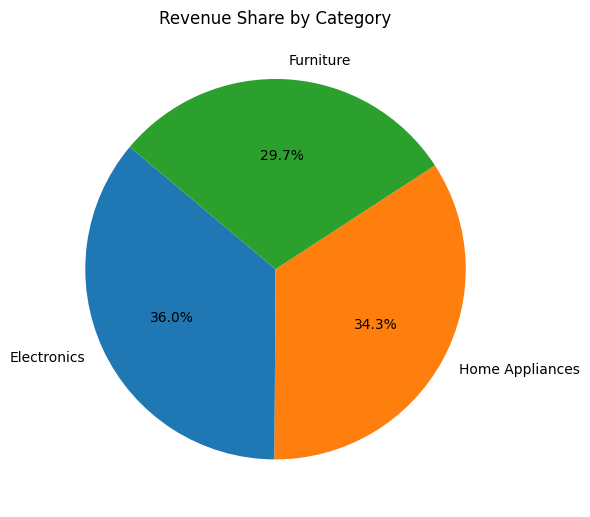

Saved 5 charts to /content: revenue_by_category.png, monthly_revenue.png, unit_price_hist.png, quantity_vs_unitprice.png, revenue_share_pie.png


In [13]:
# Cell 14 - plots (matplotlib)
plt.rcParams.update({'figure.max_open_warning': 0})

# 1) Bar: revenue by category
plt.figure(figsize=(10,5))
cats = category_summary['Product_Category']
vals = category_summary['total_revenue']
plt.bar(cats, vals)
plt.xticks(rotation=30, ha='right')
plt.title('Total Revenue by Product Category')
plt.ylabel('Total Revenue ($)')
plt.tight_layout()
plt.savefig('revenue_by_category.png')
plt.show()

# 2) Time series: monthly revenue
plt.figure(figsize=(10,4))
plt.plot(pd.to_datetime(monthly['Transaction_Date']), monthly['Monthly_Revenue'], marker='o')
plt.title('Monthly Revenue (Net_Revenue)')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.savefig('monthly_revenue.png')
plt.show()

# 3) Histogram: unit price distribution
plt.figure(figsize=(7,4))
plt.hist(df['Unit_Price'].dropna(), bins=30)
plt.title('Unit Price Distribution')
plt.xlabel('Unit Price ($)')
plt.tight_layout()
plt.savefig('unit_price_hist.png')
plt.show()

# 4) Scatter: quantity vs unit price (returns highlighted)
plt.figure(figsize=(8,5))
colors = df['Is_Return'].astype(int)   # 0 or 1
plt.scatter(df['Quantity_Sold'].abs(), df['Unit_Price'], alpha=0.7)
plt.xlabel('Quantity (abs)')
plt.ylabel('Unit Price ($)')
plt.title('Quantity vs Unit Price')
plt.tight_layout()
plt.savefig('quantity_vs_unitprice.png')
plt.show()

# 5) Pie: time/importance for posting - top categories share (optional)
plt.figure(figsize=(6,6))
plt.pie(category_summary['total_revenue'], labels=category_summary['Product_Category'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Share by Category')
plt.tight_layout()
plt.savefig('revenue_share_pie.png')
plt.show()

print("Saved 5 charts to /content: revenue_by_category.png, monthly_revenue.png, unit_price_hist.png, quantity_vs_unitprice.png, revenue_share_pie.png")


# Key summary outputs & insights you can copy into a post

In [14]:
# Cell 15 - short summaries to copy/paste
print("Top 5 categories by revenue")
display(category_summary[['Product_Category','total_revenue','orders_count','return_rate']].head(5))

print("\nTop 10 customers by Monetary (revenue)")
display(rfm[['Customer_Name','Monetary','Frequency','Recency_days']].head(10))

print("\nOverall Totals:")
print("Total Net Revenue: $", round(df['Net_Revenue'].sum(),2))
print("Total Orders:", df['Transaction_ID'].nunique())
print("Overall Return Rate: ", round(df['Is_Return'].mean()*100,2), "%")


Top 5 categories by revenue


,Product_Category,total_revenue,orders_count,return_rate
0,Electronics,21867.11,148,0.229730
2,Home Appliances,20802.35,168,0.232143
1,Furniture,18028.39,159,0.232704



Top 10 customers by Monetary (revenue)


,Customer_Name,Monetary,Frequency,Recency_days
1,Chen Wei,13446.48,78,1
2,Jane Smith,12062.61,75,3
5,Unknown,11475.53,85,2
3,John Doe,9751.45,68,3
4,Maria Gomez,6990.31,90,1
0,Ali Khan,6971.47,79,1



Overall Totals:
Total Net Revenue: $ 60697.85
Total Orders: 475
Overall Return Rate:  23.16 %


# Save cleaned dataset & export results

In [15]:
# Cell 16 - save cleaned dataset and summaries to CSV (into /content or Drive)
cleaned_path = '/content/cleaned_sales_transactions.csv'
df.to_csv(cleaned_path, index=False)
category_summary.to_csv('/content/category_summary.csv', index=False)
rfm.to_csv('/content/rfm_summary.csv', index=False)
print("Saved cleaned files to /content. You can download them or move them to Drive.")
files.download(cleaned_path)  # interactive download


Saved cleaned files to /content. You can download them or move them to Drive.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# What to check & next steps

In [16]:
# Cell 17 - checklist and suggestions printed out
print("""
EDA Checklist / Next steps:
- Review category_summary to find categories with high return_rate -> investigate product pages, descriptions, or quality.
- Inspect flagged outliers (Flag_UnitPrice_Outlier / Flag_Quantity_Outlier) to decide if they are valid bulk orders or data errors.
- Use RFM segments to design customer-specific campaigns (top-tier VIP vs reactivation).
- Consider adding hour-of-day if you have timestamps to analyze peak purchase times.
- Build dashboards (Power BI / Tableau) using the cleaned CSV and charts exported above.
""")



EDA Checklist / Next steps:
- Review category_summary to find categories with high return_rate -> investigate product pages, descriptions, or quality.
- Inspect flagged outliers (Flag_UnitPrice_Outlier / Flag_Quantity_Outlier) to decide if they are valid bulk orders or data errors.
- Use RFM segments to design customer-specific campaigns (top-tier VIP vs reactivation).
- Consider adding hour-of-day if you have timestamps to analyze peak purchase times.
- Build dashboards (Power BI / Tableau) using the cleaned CSV and charts exported above.

